In [1]:
import sys, os

# Add project_root to sys.path so Python can find `scripts/`
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [ ]:
from general_scripts.features_engineering import quicky_data, lag_features_indicators
from general_scripts.pipelines import price_model
from general_scripts.predict import future_price_prediction
from general_scripts.transformer import TimeSeriesTransformerMultiStep, TimeSeriesTransformerMultiOutput
from general_scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import torch.nn as nn

In [3]:
scaler = StandardScaler()
model_type = TimeSeriesTransformerMultiStep
criterion = nn.MSELoss()
n_forecast = 1

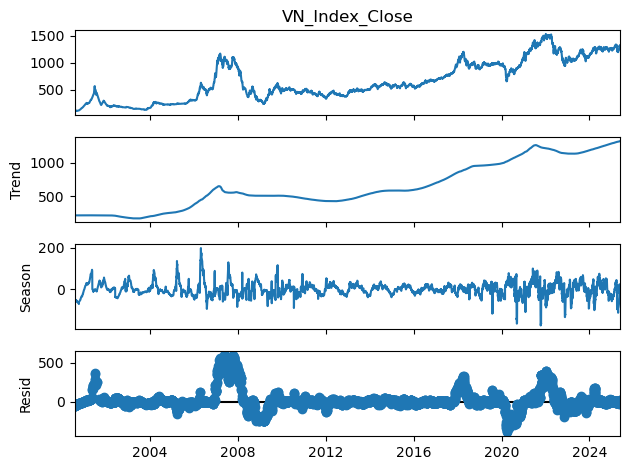

In [4]:
# 📂 Load dataset
file_path_1 = "../ready_data/cleaned_vn_index_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1)

In [5]:
df_1.tail(20)

,VN_Index_Close,Total Volume,Total Value,trend,seasonal,residual
Date,,,,,,
2025-04-23,1211.00,8.552081e+08,1.899687e+13,1312.663565,-103.498513,1.834949
2025-04-24,1223.35,7.986391e+08,1.766251e+13,1313.068027,-94.615733,4.897706
2025-04-25,1229.23,8.630187e+08,2.035038e+13,1313.472492,-89.442561,5.200069
2025-04-28,1226.80,6.797891e+08,1.415300e+13,1313.876961,-88.752879,1.675918
2025-04-29,1226.30,6.759577e+08,1.553423e+13,1314.281432,-88.160681,0.179249
2025-05-05,1240.05,6.057450e+08,1.435180e+13,1314.685907,-72.990254,-1.645653
2025-05-06,1241.95,7.804708e+08,1.784727e+13,1315.090385,-73.752483,0.612099
2025-05-07,1250.37,7.619140e+08,1.719871e+13,1315.494866,-69.169187,4.044322
2025-05-08,1269.80,8.062126e+08,1.911303e+13,1315.899350,-53.072549,6.973199


In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # 1) Fit an additive ETS model (Holt–Winters) directly to the original price,
# #    specifying both trend and seasonality in one go:
# baseline = ExponentialSmoothing(
#     df_1['VN_Index_Close'].iloc[:-n_forecast-5],
#     trend='add',            # additive trend
#     seasonal='add',         # additive seasonality
#     seasonal_periods=261    # one business‐year ≈ 261 days
# ).fit()

# # 2) Forecast the next day (one‐step ahead):
# price_forecast = baseline.forecast(n_forecast)

# # 3) If you want to extract the trend/seasonal forecasts separately:
# fitted_components = baseline.fittedvalues  # this is price = level+trend+seasonal
# level = baseline.level                     # the “smoothed level” ≈ trend
# seasonal = baseline.season                 # the seasonal factors

# print(price_forecast)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5677    1319.767575
dtype: float64
Hello
5678


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5677   -16.468254
dtype: float64
5677    1320.348905
dtype: float64
[DatetimeIndex(['2025-05-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-23 00:00:00


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
2025-05-24 19:45:17 [INFO] Epoch 00 – Train Loss: 1.5754 – Val Loss: 0.0060
2025-05-24 19:45:22 [INFO] Epoch 01 – Train Loss: 0.5265 – Val Loss: 0.0599
2025-05-24 19:45:27 [INFO] Epoch 02 – Train Loss: 0.4719 – Val Loss: 0.0285
2025-05-24 19:45:32 [INFO] Epoch 03 – Train Loss: 0.4479 – Val Loss: 0.0126
2025-05-24 19:45:37 [INFO] Epoch 04 – Train Loss: 0.3798 – Val Loss: 0.0015
2025-05-24 19:45:42 [INFO] Epoch 05 – Train Loss: 0.3840 – Val Loss: 0.0087
2025-05-24 19:45:47 [INFO] Epoch 06 – Train Loss: 0.3528 – Val Loss: 0.0005
2025-05-24 19:45:52 [INFO] Epoch 07 – Train Loss: 0.4018 – Val Loss: 0.0011
2025-05-24 19:45:58 [INFO] Epoch 08 – Train Loss: 0.3286 – Val Loss: 0.0015
2025-05-24 19:46:03 [INFO] Epoch 09 – Train Loss: 0.2905 – Val Loss: 0.0072
2025-05-24 19:46:08 [INFO] Epoch 10 – Train

Final: Training Loss: 0.1711 - Val Loss: 0.0019
Test Loss: 0.0089
5677    1318.173899
dtype: float64
Date
2025-05-23    1314.460001
dtype: float64
(1,)
1 1 1
RMSE: 3.7139, MAE: 3.7139, R²: nan, Directional Accuracy: nan


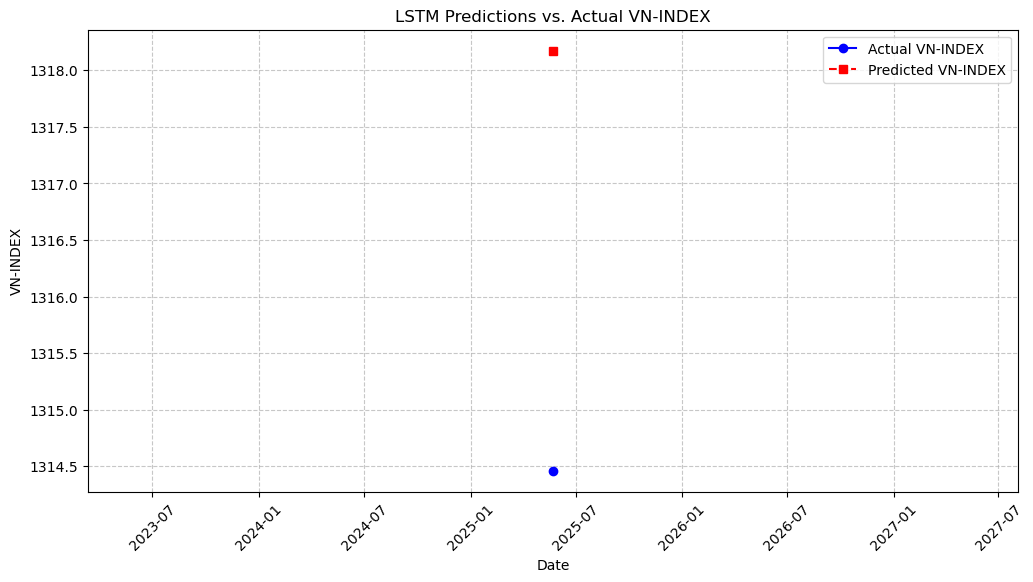

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-23      1314.460001         1318.173899


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5676    1320.521686
dtype: float64
Hello
5677
5676   -16.568026
dtype: float64
5676    1319.94438
dtype: float64
[DatetimeIndex(['2025-05-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-22 00:00:00


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

Final: Training Loss: 0.1702 - Val Loss: 0.0002
Test Loss: 0.0024
5676    1312.942343
dtype: float64
Date
2025-05-22    1313.84
dtype: float64
(1,)
1 1 1
RMSE: 0.8977, MAE: 0.8977, R²: nan, Directional Accuracy: nan


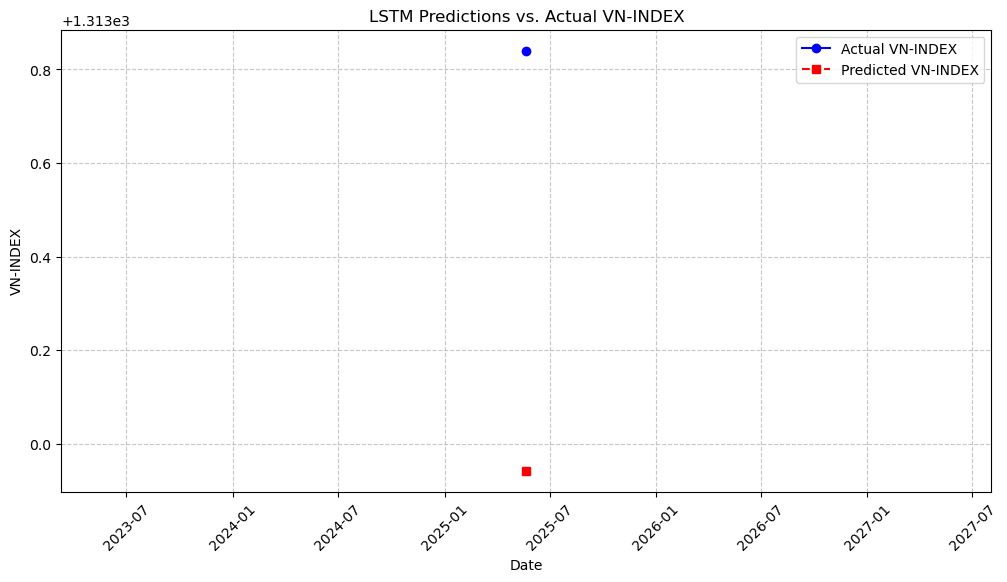

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-22          1313.84         1312.942343


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5675    1318.03855
dtype: float64
Hello
5676


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5675   -13.265141
dtype: float64
5675    1319.53986
dtype: float64
[DatetimeIndex(['2025-05-08'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-21 00:00:00


/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
2025-05-24 19:58:47 [INFO] Epoch 00 – Train Loss: 1.6042 – Val Loss: 0.0096
2025-05-24 19:58:59 [INFO] Epoch 01 – Train Loss: 0.5822 – Val Loss: 0.0637
2025-05-24 19:59:10 [INFO] Epoch 02 – Train Loss: 0.4584 – Val Loss: 0.1035
2025-05-24 19:59:20 [INFO] Epoch 03 – Train Loss: 0.4085 – Val Loss: 0.0236
2025-05-24 19:59:30 [INFO] Epoch 04 – Train Loss: 0.3923 – Val Loss: 0.0082
2025-05-24 19:59:41 [INFO] Epoch 05 – Train Loss: 0.3485 – Val Loss: 0.0652
2025-05-24 19:59:51 [INFO] Epoch 06 – Train Loss: 0.3876 – Val 

Final: Training Loss: 0.1705 - Val Loss: 0.0344
Test Loss: 0.0000
5675    1318.037483
dtype: float64
Date
2025-05-21    1323.049999
dtype: float64
(1,)
1 1 1
RMSE: 5.0125, MAE: 5.0125, R²: nan, Directional Accuracy: nan


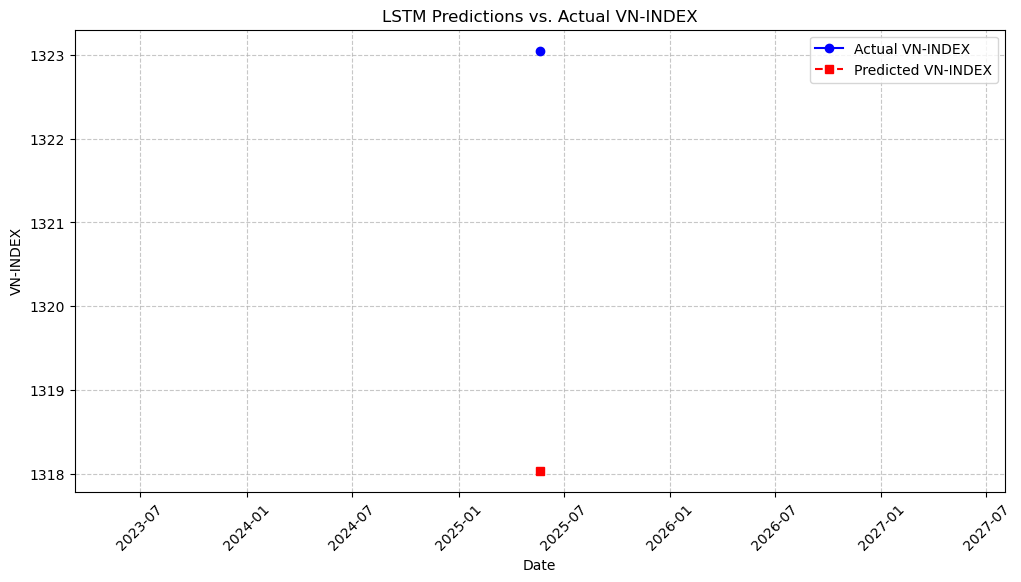

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-21      1323.049999         1318.037483


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5674    1300.275128
dtype: float64
Hello
5675


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5674   -7.292922
dtype: float64
5674    1319.135344
dtype: float64
[DatetimeIndex(['2025-05-07'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-08'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-20 00:00:00


/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
2025-05-24 20:08:02 [INFO] Epoch 00 – Train Loss: 1.2233 – Val Loss: 0.0002
2025-05-24 20:08:13 [INFO] Epoch 01 – Train Loss: 0.5190 – Val Loss: 0.0499
2025-05-24 20:08:24 [INFO] Epoch 02 – Train Loss: 0.5226 – Val Loss: 0.0001
2025-05-24 20:08:34 [INFO] Epoch 03 – Train Loss: 0.3563 – Val Loss: 0.0146
2025-05-24 20:08:45 [INFO] Epoch 04 – Train Loss: 0.4069 – Val Loss: 0.0258
2025-05-24 20:09:00 [INFO] Epoch 05 – Train Loss: 0.3970 – Val Loss: 0.0807
2025-05-24 20:09:11 [INFO] Epoch 06 – Train Loss: 0.4601 – Val 

Final: Training Loss: 0.1691 - Val Loss: 0.0145
Test Loss: 0.0402
5674    1303.651758
dtype: float64
Date
2025-05-20    1315.150001
dtype: float64
(1,)
1 1 1
RMSE: 11.4982, MAE: 11.4982, R²: nan, Directional Accuracy: nan


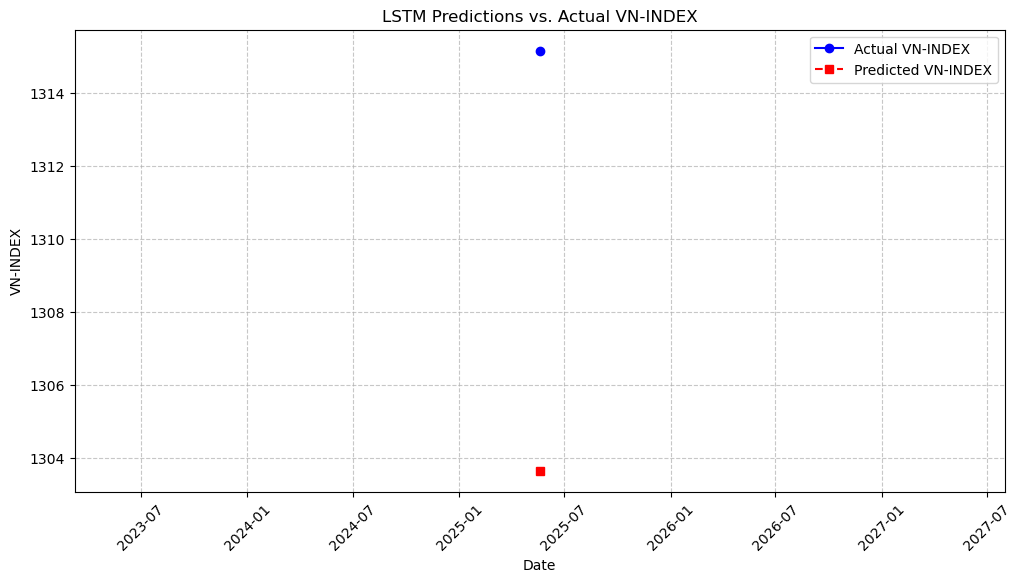

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-20      1315.150001         1303.651758


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5673    1301.44198
dtype: float64
Hello
5674


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5673   -10.057838
dtype: float64
5673    1318.730832
dtype: float64
[DatetimeIndex(['2025-05-06'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-07'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-08'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-09'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-19 00:00:00


/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
2025-05-24 20:17:21 [INFO] Epoch 00 – Train Loss: 1.2459 – Val Loss: 0.0941
2025-05-24 20:17:32 [INFO] Epoch 01 – Train Loss: 0.5831 – Val Loss: 0.1508
2025-05-24 20:17:44 [INFO] Epoch 02 – Train Loss: 0.4475 – Val Loss: 0.0569
2025-05-24 20:17:55 [INFO] Epoch 03 – Train Loss: 0.4541 – Val Loss: 0.0791
2025-05-24 20:18:07 [INFO] Epoch 04 – Train Loss: 0.3578 – Val Loss: 0.1387
2025-05-24 20:18:17 [INFO] Epoch 05 – Train Loss: 0.3818 – Val Loss: 0.0600
2025-05-24 20:18:28 [INFO] Epoch 06 – Train Loss: 0.3502 – Val 

Final: Training Loss: 0.1604 - Val Loss: 0.0573
Test Loss: 0.0118
5673    1294.480495
dtype: float64
Date
2025-05-19    1296.29
dtype: float64
(1,)
1 1 1
RMSE: 1.8095, MAE: 1.8095, R²: nan, Directional Accuracy: nan


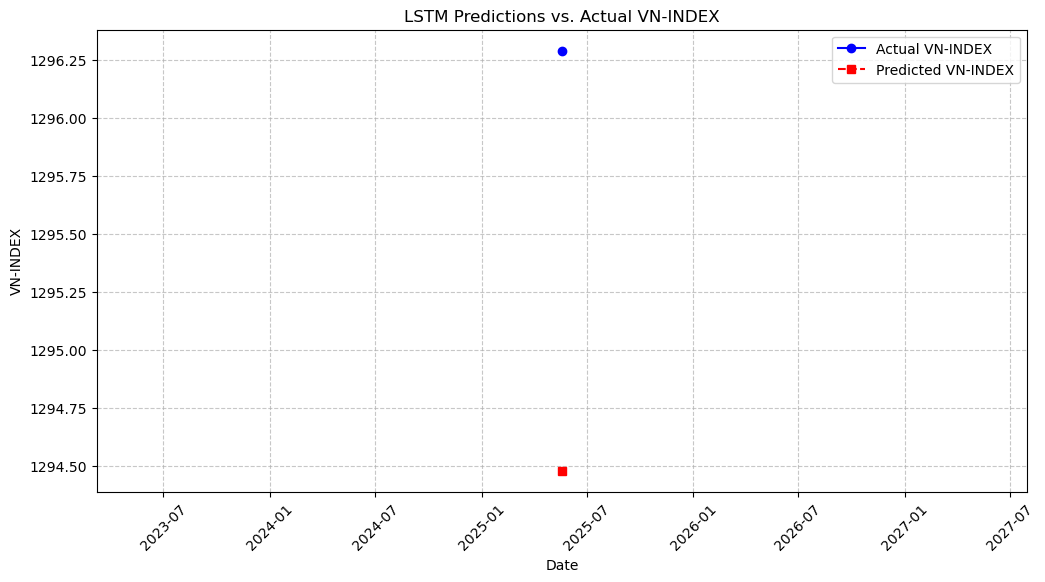

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-19          1296.29         1294.480495


In [7]:
# 📊 Select only VN-INDEX for prediction
# data = df_1[["VN_Index_Close", 'trend',
#        'seasonal', 'residual']]

for i in range(5):
    baseline = ExponentialSmoothing(
    df_1['VN_Index_Close'].iloc[:-n_forecast*(i+1)],
    trend='add',            # additive trend
    seasonal='add',         # additive seasonality
    seasonal_periods=261    # one business‐year ≈ 261 days
    ).fit()

    # 2) Forecast the next day (one‐step ahead):
    price_forecast = baseline.forecast(n_forecast)

    # 3) If you want to extract the trend/seasonal forecasts separately:
    fitted_components = baseline.fittedvalues  # this is price = level+trend+seasonal
    level = baseline.level                     # the “smoothed level” ≈ trend
    seasonal = baseline.season                 # the seasonal factors

    print(price_forecast)

    data = df_1[['residual', 'trend', 'seasonal']]

    if i:
        data = data.iloc[:-n_forecast*i]
    # 🚀 Train the model and get the test set
    model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=20, test_seq_len=n_forecast, epochs=50)

# 🔮 Generate future predictions
# future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [8]:
data

,residual,trend,seasonal
Date,,,
2000-07-28,-53.972983,210.369815,-56.396832
2000-07-31,-54.736669,210.395971,-54.109302
2000-08-02,-50.314485,210.421753,-56.727269
2000-08-04,-49.950851,210.447161,-55.296311
2000-08-07,-50.149493,210.472193,-53.402700
...,...,...,...
2025-05-13,-3.536914,1317.112824,-20.145909
2025-05-14,-26.603538,1317.517321,18.816216
2025-05-15,-27.952317,1317.921823,23.230494


In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = df_1

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

Hello
5678


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5673   -10.057838
5674     2.027369
5675     6.529484
5676    -0.374129
5677     3.839172
dtype: float64
5673    1318.730832
5674    1319.135337
5675    1319.539842
5676    1319.944346
5677    1320.348851
dtype: float64
[DatetimeIndex(['2025-05-06', '2025-05-07', '2025-05-08', '2025-05-09',
               '2025-05-12'],
              dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-07', '2025-05-08', '2025-05-09', '2025-05-12',
               '2025-05-13'],
              dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-08', '2025-05-09', '2025-05-12', '2025-05-13',
               '2025-05-14'],
              dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-09', '2025-05-12', '2025-05-13', '2025-05-14',
               '2025-05-15'],
              dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-12', '2025-05-13', '2025-05-14', '2025-05-15',
               '2025-05-16'],
              dtype='d

[I 2025-05-24 20:26:16,316] A new study created in memory with name: no-name-70939029-885f-42bb-989a-742f7dbc7d58
/opt/anaconda3/lib/python3.11/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
2025-05-24 20:26:36 [INFO] Epoch 00 – Train Loss: 12.3890 – Val Loss: 0.0862
2025-05-24 20:26:54 [INFO] Epoch 01 – Train Loss: 5.5783 – Val Loss: 0.0242
2025-05-24 20:27:12 [INFO] Epoch 02 – Train Loss: 5.5240 – Val Loss: 0.0372
2025-05-24 20:27:30 [INFO] Epoch 03 – Train Loss: 5.8824 – Val Loss: 0.0102
2025-05-24 20:27:55 [INFO] Epoch 04 – Train Loss: 6.4959 – Val Loss: 0.1052
2025-05-24 20:28:14 [INF

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1[["VN_Index_Close", 'trend',
       'seasonal', 'residual']], ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
# 📊 Select additional VN-INDEX statistics for prediction
data = lag_features_indicators(df_1, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
# 📂 Load dataset
file_path_2 = "../ready_data/vn_index_external_data.csv"
df_2 = pd.read_csv(file_path_2)
df_2 = quicky_data(df_2)

In [ ]:
data = df_2

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
data = lag_features_indicators(df_2, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
data = lag_features_indicators(df_2, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
# 📂 Load dataset
file_path_3 = "../ready_data/vn_index_merged_data.csv"
df_3 = pd.read_csv(file_path_3)
df_3 = quicky_data(df_3)

In [ ]:
data = df_3

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
data = lag_features_indicators(df_3, ['VN_Index_Close'])

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
data = lag_features_indicators(df_3, df_3.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
data = lag_features_indicators(df_3, df_1.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

In [ ]:
data = lag_features_indicators(df_3, df_2.columns)

# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)